In [189]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(os.path.join('data','mouse_drug_data.csv'))
clinical_trial_data_df = pd.read_csv(os.path.join('data','clinicaltrial_data.csv'))

# Combine the data into a single dataset
clinical_trial_data_complete_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, how='inner',on='Mouse ID')

# Display the data table for preview
clinical_trial_data_complete_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [190]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
clinical_trial_data_complete_gb = clinical_trial_data_complete_df.groupby(['Drug','Timepoint'])
# Convert to DataFrame
tumor_response_df1 = pd.DataFrame(clinical_trial_data_complete_gb['Tumor Volume (mm3)'].mean())
tumor_response_df1 = tumor_response_df1.reset_index()
# Preview DataFrame
tumor_response_df1.head(4)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [191]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
tumor_response_df2 = pd.DataFrame(clinical_trial_data_complete_gb['Tumor Volume (mm3)'].sem())
tumor_response_df2 = tumor_response_df2.reset_index()
# Preview DataFrame
tumor_response_df2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [192]:
tumor_response_df1 = tumor_response_df1.set_index(['Timepoint'])
tumor_response_df2 = tumor_response_df2.set_index(['Timepoint'])

In [193]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
tumor_response_df1a = pd.DataFrame()
tumor_response_df2a = pd.DataFrame()
for drug in tumor_response_df1['Drug'].unique():
    tumor_response_df1a[drug] = tumor_response_df1[tumor_response_df1['Drug']  == drug]['Tumor Volume (mm3)']
    tumor_response_df2a[drug] = tumor_response_df2[tumor_response_df2['Drug']  == drug]['Tumor Volume (mm3)']

tumor_response_df1a.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [194]:
tumor_response_df1a = tumor_response_df1a.reset_index()
#tumor_response_df2a = tumor_response_df2a.reset_index()

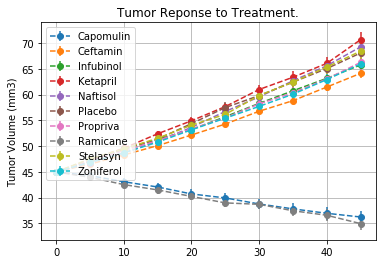

In [195]:
# Generate the Plot (with Error Bars)
#Add the figure
fig, axes = plt.subplots(1,1,sharex=True, sharey=True)

#Turn on the grid
axes.grid()
for column in tumor_response_df1a:
    if column != 'Timepoint':
        axes.errorbar(x=tumor_response_df1a['Timepoint'], y=tumor_response_df1a[column], \
                     yerr=tumor_response_df2a[column],
                     label=column, \
                     linestyle='dashed', marker='o'
                     )
        
        
# Plot title
plt.title('Tumor Reponse to Treatment.')
axes.set_ylabel('Tumor Volume (mm3)')
# # Create a legend
plt.legend(loc='upper left' )
plt.show()


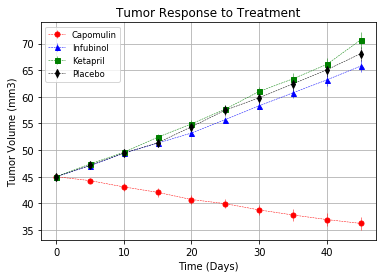

## Metastatic Response to Treatment

In [196]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
meta_response_df1 = pd.DataFrame(clinical_trial_data_complete_gb['Metastatic Sites'].mean())

# Preview DataFrame
meta_response_df1.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [197]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
meta_response_df2 = pd.DataFrame(clinical_trial_data_complete_gb['Metastatic Sites'].sem())
# Preview DataFrame
meta_response_df2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [198]:
meta_response_df1 = meta_response_df1.reset_index()
meta_response_df2 = meta_response_df2.reset_index()
meta_response_df1 = meta_response_df1.set_index(['Timepoint'])
meta_response_df2 = meta_response_df2.set_index(['Timepoint'])

In [199]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
meta_response_df1a = pd.DataFrame()
meta_response_df2a = pd.DataFrame()
for drug in meta_response_df1['Drug'].unique():
    meta_response_df1a[drug] = meta_response_df1[meta_response_df1['Drug']  == drug]['Metastatic Sites']
    meta_response_df2a[drug] = meta_response_df2[meta_response_df2['Drug']  == drug]['Metastatic Sites']
meta_response_df1a.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [200]:
meta_response_df1a = meta_response_df1a.reset_index()
#meta_response_df2a = meta_response_df2a.reset_index()

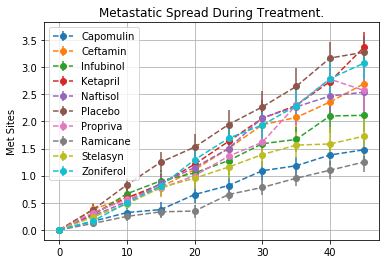

In [201]:
# Generate the Plot (with Error Bars)
#Add the figure
fig, axes = plt.subplots(1,1,sharex=True, sharey=True)

#Turn on the grid
axes.grid()
for column in meta_response_df1a:
    if column != 'Timepoint':
        axes.errorbar(x=meta_response_df1a['Timepoint'], y=meta_response_df1a[column], \
                     yerr=meta_response_df2a[column],
                     label=column, \
                     linestyle='dashed', marker='o'
                     )
        
        
# Plot title
plt.title('Metastatic Spread During Treatment.')
axes.set_ylabel("Met Sites");

# # Create a legend
plt.legend(loc='upper left' )
plt.show()


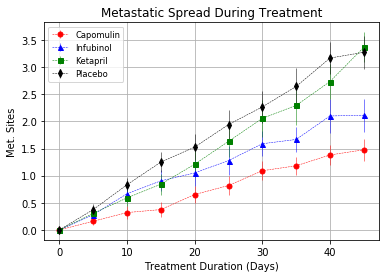

## Survival Rates

In [202]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
survival_rates_df1 = pd.DataFrame(clinical_trial_data_complete_gb['Mouse ID'].count())
survival_rates_df1.rename(inplace=True, columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
survival_rates_df1.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [203]:
survival_rates_df1 = survival_rates_df1.reset_index()
survival_rates_df1 = survival_rates_df1.set_index(['Timepoint'])

In [39]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_df1a = pd.DataFrame()
for drug in survival_rates_df1['Drug'].unique():
    survival_rates_df1a[drug] = survival_rates_df1[survival_rates_df1['Drug']  == drug]['Mouse Count']
    
# Preview the Data Frame
survival_rates_df1a

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [204]:
survival_rates_df1a = survival_rates_df1a.reset_index()

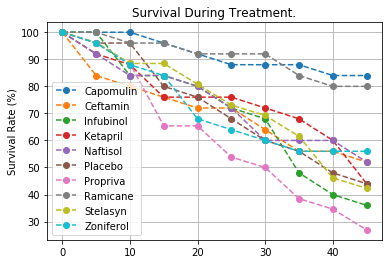

In [181]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
# Generate the Plot (with Error Bars)
#Add the figure
fig, axes = plt.subplots(1,1,sharex=True, sharey=True)

#Turn on the grid
axes.grid()
for column in survival_rates_df1a:
    if column != 'Timepoint':
        axes.errorbar(x=survival_rates_df1a['Timepoint'], y=(survival_rates_df1a[column]/survival_rates_df1a[column][0])*100, \
                     label=column, \
                     linestyle='dashed', marker='o'
                     )
        
        
# Plot title
plt.title('Survival During Treatment.')
axes.set_ylabel("Survival Rate (%)");

# # Create a legend
plt.legend(loc='bottom left' )
plt.show()


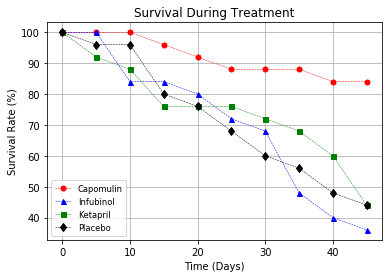

## Summary Bar Graph

In [205]:
tumor_response_df1a = tumor_response_df1a.reset_index()
tumor_response_df1a = tumor_response_df1a.set_index('Timepoint')

# Calculate the percent changes for each drug
summary_df = pd.DataFrame(index=[drug for drug in tumor_response_df1a], columns=['Percent Change'])
summary_df.index.name = 'Drug'
for drug in tumor_response_df1a:
    summary_df['Percent Change'][drug] = (((tumor_response_df1a[drug][45] - tumor_response_df1a[drug][0])/ \
                                           tumor_response_df1a[drug][0])*100)

# Display the data to confirm
summary_df

,Percent Change
Drug,
index,inf
Capomulin,-19.4753
Ceftamin,42.5165
Infubinol,46.1235
Ketapril,57.0288
Naftisol,53.9233
Placebo,51.298
Propriva,47.2412
Ramicane,-22.3209


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

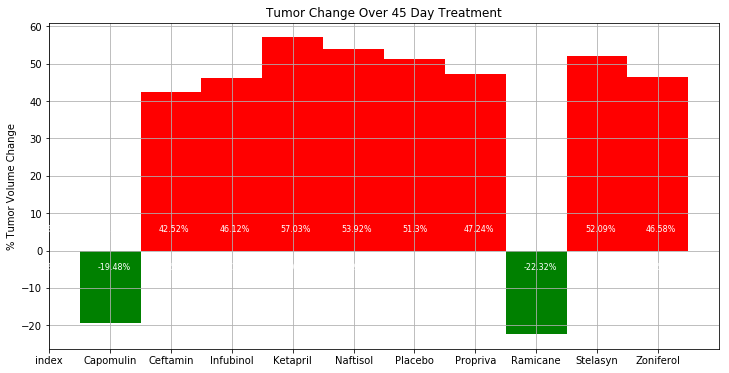

In [206]:
fig = plt.figure(figsize=(12, 6)); 
axes = fig.add_subplot(1, 1, 1)

#Turn on the grid
axes.grid()
for index, cell in summary_df.iterrows():
    axes.bar(x=index, y=0, height=cell['Percent Change'], \
                 color= cell.map(lambda x: 'r' if x >= 0 else'g'), \
                 width=1
            )

rects = axes.patches

# Make some labels.
for i in rects:
    axes.text(x=i.get_x()+.3, y=5, \
            s=str(round((i.get_height()), 2))+'%', fontsize=8, 
                color='white')
    axes.text(x=i.get_x()+.3, y=-5, \
            s=str(round((i.get_height()), 2))+'%', fontsize=8, 
                color='white')
# Plot title
plt.title('Tumor Change Over 45 Day Treatment')
axes.set_ylabel("% Tumor Volume Change");

# # Create a legend
# plt.legend(loc='bottom left' )
plt.show()


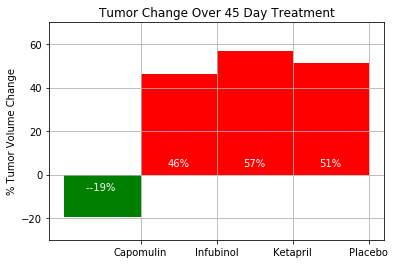